# Table of contents

1. [**Problem Description**](#1)
2. [**Gurobi**](#2)
3. [**References**](#3)

# 1- Problem Description <a id="1"></a>

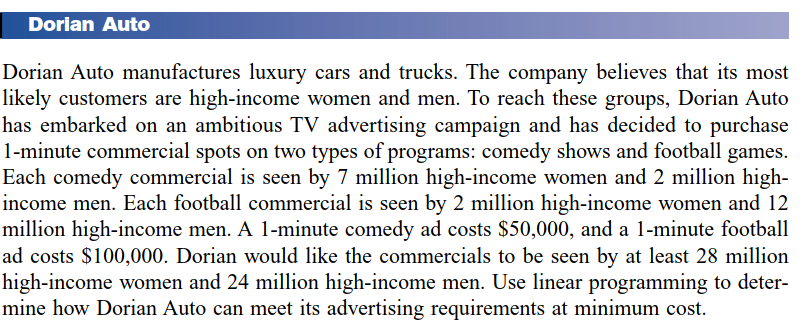

**Brief Summary of Data**

|Types of program|is seen by women|is seen by men|1-min cost|var|
|----------------|----------------|--------------|----------|---|
|Comedy          |7 million       |2 million     |50,000    |$x_{1}$|
|Football        |2 million       |12 million    |100,000   |$x_{2}$|
|----------------|----------------|--------------|----------|---|
|min requirement |28 million      |24 million    |          |   |


__Defining Model__:

**sets:**<br>
_**I**_: number of TV advertising program {Comedy, Football}<br><br>
**Parameters**:<br>
_Purchase Cost_:  [50, 100] <br>
_Women Coeff_:    [7, 2]<br>
_Men Coeff_:      [2, 12]<br>
_Min Req_:        [28, 24]<br><br>
**Variables**:<br>
$X_{i}$:nubmer of 1-minute TV program ads purchased $\forall i \in I$<br><br>
**Mathematical Model**:

$$\begin{align}
\min Z=&\sum_{i\in I} Purchase cost_{i} * X_{i}\\
\text{S.t}\\
&\sum_{i\in I}WomenCoeff_{i} * X_{i} \geq 28\\
&\sum_{i\in I}MenCoeff_{i} * X_{i} \geq 24\\
&X_{i} \geq 0 & \forall i \in I\\
\end{align}$$

# ِ2- Gurobi <a id="2"></a>

In [1]:
from gurobipy import GRB, Model, quicksum

In [2]:
def output(m):
    
    status_code = {1:'LOADED',
                   2: 'OPTIMAL',
                   3:'INFEASIBLE',
                   4:'INF_OR_UNBD',
                   5:'UNBOUNDED'}
    
    status = m.status
    print(f'The optimization status is: {status_code[status]}')
    
    if status == 2:
        print('Optimal solution:')
        for var in m.getVars():
            print(f'{var.varName} = {var.x}')
        print(f'Optimal Objective Function = {m.objVal}')

## Declaring Parameters

In [6]:
Variables     = ['Comedy', 'Football']
Purchase_Cost = [50, 100]
Women_Coeff   = [7, 2]
Men_Coeff     = [2, 12]
RHS           = [28,24]   #In this model, it is used manually. 

## Model

In [4]:
def Gurobi_Model(variables, purchase, W_Cost, M_Cost, rhs):
    
    model = Model('DorianAuto')           #set model
    
    model.setParam('outputFlag', True)    #set result parameters
    
    var_dim = len(variables)              #set dimention of variable
    
    X = model.addVars(var_dim, lb=0, ub=GRB.INFINITY, vtype = GRB.CONTINUOUS, name = variables) #declaring vaiables
    
    model.setObjective( (quicksum(purchase[i]*X[i] for i in range(var_dim))), GRB.MINIMIZE)     #set objective function
    
    model.addConstr( (quicksum(W_Cost[i]*X[i] for i in range(var_dim))) >= rhs[0])              #set minimum women and_
    model.addConstr( (quicksum(M_Cost[i]*X[i] for i in range(var_dim))) >= rhs[1])              #_men viewers constraint
    
    model.optimize()
    
    output(model)

In [5]:
Gurobi_Model(Variables, Purchase_Cost, Women_Coeff, Men_Coeff, RHS)

Restricted license - for non-production use only - expires 2024-10-28
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: Intel(R) Core(TM) i5-4210U CPU @ 1.70GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 2 rows, 2 columns and 4 nonzeros
Model fingerprint: 0x599b40b9
Coefficient statistics:
  Matrix range     [2e+00, 1e+01]
  Objective range  [5e+01, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 3e+01]
Presolve time: 0.04s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   6.500000e+00   0.000000e+00      0s
       2    3.2000000e+02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.06 seconds (0.00 work units)
Optimal objective  3.200000000e+02
The optimization status is: OPTIMAL
Optimal solution:
Football = 3.5999999999999996
Comedy = 1.4000000000000001
Op

# 3- Reference <a id="3"></a>

[**Operations Research** Wayne L.Winston, page60](https://itslearningakarmazyan.files.wordpress.com/2015/09/operation-research-aplications-and-algorithms.pdf)